#### Deep Neural Network 알고리즘을 Python의 Numpy를 기반으로 class와 def 모듈화로 구현

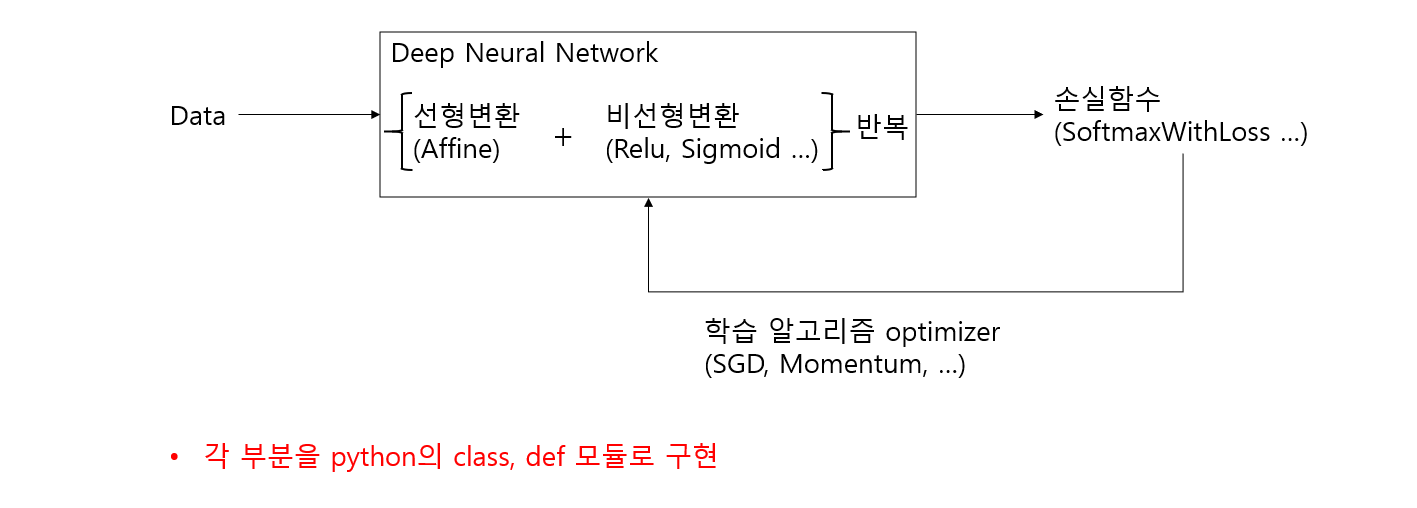

- 밑바닥부터 시작하는 딥러닝에서는 다음과 같은 class, def 모듈을 모아놓은 파일이 있음.
- 이를 사용하여 DNN을 구현해볼 것임

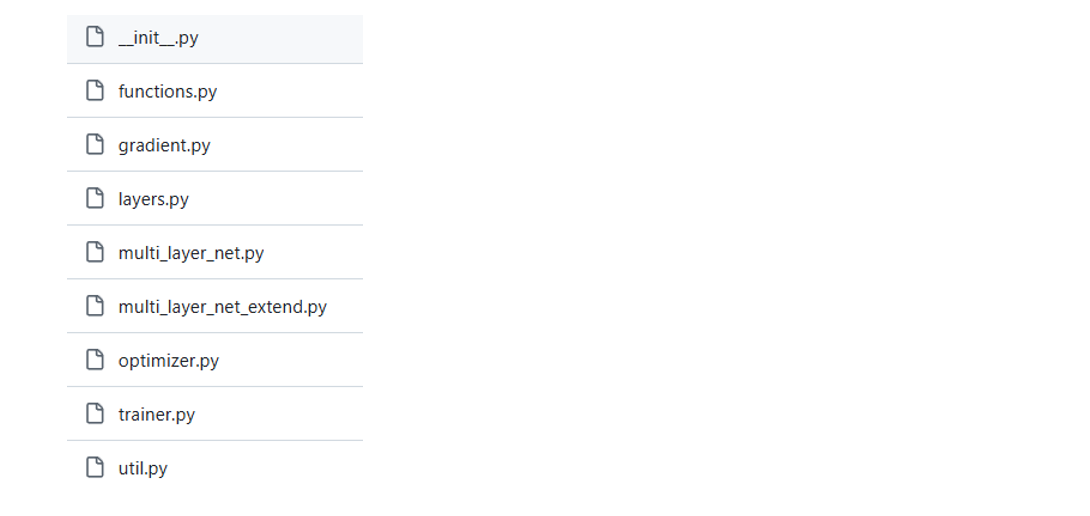

# 
- jupyter notebook 을 사용하여 다른 폴더에 py 파일들을 import 하는 과정

In [1]:
import sys, os

# 1) 현재 노트북(Project/)의 상위 폴더(2025 비교과특강/) 절대경로
base_dir = os.path.abspath('..')

# 2) 중복 추가 방지 후 sys.path에 삽입
if base_dir not in sys.path:
    sys.path.append(base_dir)

# (옵션) 변경된 모듈 자동 반영
%load_ext autoreload
%autoreload 2

In [2]:
# 함수·레이어·최적화 기법 등 필요한 모듈을 한 번에 가져오기
from common.functions               import *
from common.gradient                import *
from common.layers                  import *
from common.multi_layer_net         import *
from common.multi_layer_net_extend  import *
from common.optimizer               import *
from common.trainer                 import *
from common.util                    import *

# 문제 1
## MNIST 데이터 Neural Network로 학습하기
1. [784 ,100 ,50 ,10 ] 구조를 가지는 신경망을 설계하여 학습
2. loss 는 Cross entropy 사용 (Softmax 모듈 사용)

# 
### - MNIST 데이터 로드

In [4]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
X_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

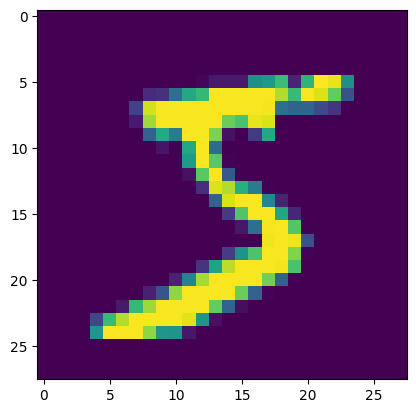

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

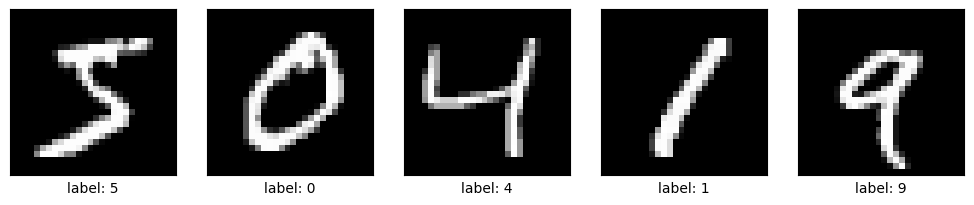

In [7]:


# 원본 데이터 형태로 변환 (flatten 이전 상태로 되돌리기)
# 만약 이미 flatten된 상태라면 28x28 형태로 다시 변환
X_sample = X_train[2].reshape(28, 28)

# 이미지 시각화
# plt.figure(figsize=(5, 5))
# plt.imshow(X_sample, cmap='gray')
# plt.title(f'MNIST sample image (label: {y_train[0]})')
# plt.colorbar()
# plt.grid(False)
# plt.show()

# 여러 이미지 한번에 시각화
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f'label: {y_train[i]}')
plt.tight_layout()
plt.show()

In [8]:
len(X_train)

60000

# 
#### 1-1번 문제 :
#### Train data와 Test data의 픽셀값을 0에서 1 사이로 정규화하세요.

In [9]:
# 정규화 전 훈련 데이터 최소값과 최대값 확인
print("정규화 전 훈련 데이터 최소값:", X_train.min())
print("정규화 전 훈련 데이터 최대값:", X_train.max())

# 정규화: 0~1 사이로 변환
X_train = X_train / 255.0
X_test = X_test / 255.0

print("정규화 후 훈련 데이터 최소값:", X_train.min())
print("정규화 후 훈련 데이터 최대값:", X_train.max())

정규화 전 훈련 데이터 최소값: 0.0
정규화 전 훈련 데이터 최대값: 255.0
정규화 후 훈련 데이터 최소값: 0.0
정규화 후 훈련 데이터 최대값: 1.0


In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

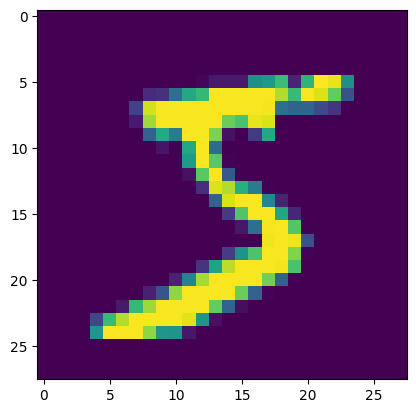

In [11]:
plt.imshow(X_train[0])
plt.show()

# 
#### 1-2번 문제 :
#### Train data와 Test data의 shape을 784차원으로 flatten 하세요.

In [12]:
# 현재 데이터 형태 확인
print("훈련 데이터 형태:", X_train.shape)
print("테스트 데이터 형태:", X_test.shape)

# 데이터를 784차원으로 flatten
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 확인
print("Flatten 후 훈련 데이터 형태:", X_train.shape)
print("Flatten 후 테스트 데이터 형태:", X_test.shape)

훈련 데이터 형태: (60000, 28, 28)
테스트 데이터 형태: (10000, 28, 28)
Flatten 후 훈련 데이터 형태: (60000, 784)
Flatten 후 테스트 데이터 형태: (10000, 784)


In [13]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
len(X_train[0])

784

# 
#### 1-3번 문제 :
#### 다음 one-hot 인코딩 함수를 사용하여 Train, Test 의 label을 원핫 인코딩으로 변환하세요.

In [15]:
def one_hot_encode(labels, num_classes=10):
    """
    One-hot encodes a NumPy array of labels.

    Args:
    labels: A 1D NumPy array of labels.
    num_classes: The number of unique classes.

    Returns:
    A 2D NumPy array where each row is a one-hot vector representing a label.
    """

    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

In [16]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
print(f"라벨 데이터 형태 확인: {y_train.shape, y_test.shape}")
print(f"라벨 데이터 타입 확인: {y_train.dtype, y_test.dtype}")
print(f"라벨 데이터 길이 확인: {len(y_train), len(y_test)}")
print(f"라벨 데이터 값 확인: {y_train[:10]}, {y_test[:10]}")

라벨 데이터 형태 확인: ((60000,), (10000,))
라벨 데이터 타입 확인: (dtype('uint8'), dtype('uint8'))
라벨 데이터 길이 확인: (60000, 10000)
라벨 데이터 값 확인: [5 0 4 1 9 2 1 3 1 4], [7 2 1 0 4 1 4 9 5 9]


In [18]:
# 레이블을 원핫 인코딩으로 변환
y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# 확인
print(f"인코딩 전후 훈련 레이블 형태: {y_train.shape} -> {y_train_oh.shape}")
print(f"인코딩 전후 테스트 레이블 형태: {y_test.shape} -> {y_test_oh.shape}")
print("첫 번째 레이블 예시:", y_train[:10], "->\n", y_train_oh[:10])

인코딩 전후 훈련 레이블 형태: (60000,) -> (60000, 10)
인코딩 전후 테스트 레이블 형태: (10000,) -> (10000, 10)
첫 번째 레이블 예시: [5 0 4 1 9 2 1 3 1 4] ->
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# 
### - MNIST를 풀기위한 신경망 설계
#### 1-4번 문제 : 아래 조건을 만족하는 MultiLayerNet 신경망을 설계하세요.
1. [784 ,100 ,50 ,10 ] 구조를 가지는 신경망을 설계하여 학습 (활성함수는 Sigmoid 사용)
2. loss 는 Cross entropy 사용 (Softmax 모듈 사용)

In [19]:
input_size = 784
hidden_size_list = [100, 50]
output_size = 10
activation = 'sigmoid'
weight_init_std = 'sigmoid'

network = MultiLayerNet(input_size=input_size, hidden_size_list=hidden_size_list, output_size=output_size,
                        activation=activation, weight_init_std=weight_init_std)

# # 신경망 구조 확인
print("신경망 구조:", network.params.keys())

신경망 구조: dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])


In [20]:
network.layers

OrderedDict([('Affine1', <common.layers.Affine at 0x20195028f10>),
             ('Activation_function1',
              <common.layers.Sigmoid at 0x20195085cd0>),
             ('Affine2', <common.layers.Affine at 0x20195087550>),
             ('Activation_function2',
              <common.layers.Sigmoid at 0x20195085e90>),
             ('Affine3', <common.layers.Affine at 0x20195086250>)])

In [21]:
network.last_layer

# 
#### Mini batch 함수
- MNIST 데이터셋은 6만개 학습데이터를 가지므로 한 번에 올려서 학습하는 것이 어려움.
- 그러므로 배치 사이즈로 분할하는 미니 배치 학습 방법을 사용함.
- 아래 shuffle_batch 함수는 데이터와 레이블을 쌍으로 받아서 섞은 후 미니배치로 돌려주는 함수임.

#### 1-5번 문제 :
#### shuffle_batch 함수를 사용하여  아래 for문을 출력해봄으로써 미니 배치로 데이터를 주는 경우를 이해해보세요

In [22]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [23]:
for X_batch, y_batch in shuffle_batch(X_train, y_train, 200):
    print(np.shape(X_batch))
    print(np.shape(y_batch))

(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 784)

In [24]:
print(f"배치 후 데이터 길이: {len(X_batch), len(y_batch)}")
print(f"배치사이즈: {X_batch.shape, y_batch.shape}")


배치 후 데이터 길이: (200, 200)
배치사이즈: ((200, 784), (200,))


#### 1-6번 문제 :
#### 아래 조건을 만족하는 MNIST 문제를 학습해보세요.

1. 학습률은 0.1
2. 배치 사이즈는 200
3. 5 에폭 학습, 배치 사이즈로 업데이트마다 (Train data 6만개, Test data 1만개의 손실값 저장하여 학습이 끝난 후 배치 사이즈에 따른 손실값 시각화 그래프 출력)
4. 에폭마다 Train data, Test data에 대한 손실값과 정확도 출력
5. 학습이 모두 끝난 후 Train data와 Test data에 대한 손실값과 정확도 출력

In [25]:
lr = 0.1
batch_size = 200
epochs = 5

train_loss_list = []
test_loss_list = []

for i in range(epochs):
    for X_batch, y_batch in shuffle_batch(X_train, y_train_oh, batch_size):
        grads = network.gradient(X_batch, y_batch)
        for key in network.params.keys():
            network.params[key] -= lr * grads[key]

        train_loss = network.loss(X_train, y_train_oh)
        test_loss = network.loss(X_test, y_test_oh)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

    
    train_loss = network.loss(X_train, y_train_oh)
    test_loss = network.loss(X_test, y_test_oh)
    train_acc = network.accuracy(X_train, y_train_oh)
    test_acc = network.accuracy(X_test, y_test_oh)

    print(f"epoch {i+1}/{epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

epoch 1/5 - Train Loss: 2.0228, Train Acc: 0.4793, Test Loss: 2.0173, Test Acc: 0.4806
epoch 2/5 - Train Loss: 1.0776, Train Acc: 0.7141, Test Loss: 1.0637, Test Acc: 0.7214
epoch 3/5 - Train Loss: 0.7133, Train Acc: 0.8134, Test Loss: 0.6990, Test Acc: 0.8192
epoch 4/5 - Train Loss: 0.5575, Train Acc: 0.8542, Test Loss: 0.5428, Test Acc: 0.8567
epoch 5/5 - Train Loss: 0.4751, Train Acc: 0.8736, Test Loss: 0.4605, Test Acc: 0.8750


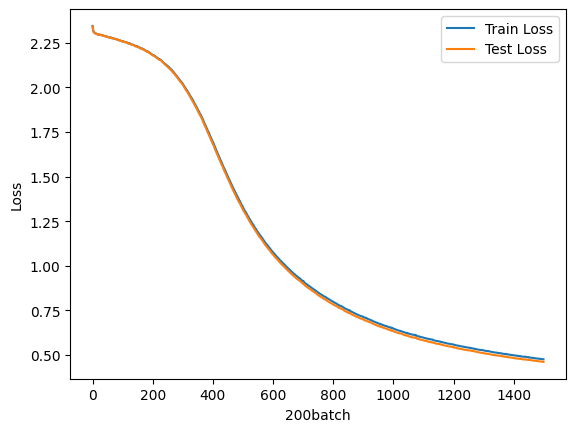

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label='Train Loss')
plt.plot(np.arange(len(test_loss_list)), test_loss_list, label='Test Loss')
plt.legend()
plt.xlabel('200batch')
plt.ylabel('Loss')
plt.show()

Epoch 1, Batch 0/300, Loss: 0.0894
Epoch 1, Batch 100/300, Loss: 0.0415
Epoch 1, Batch 200/300, Loss: 0.0375
Epoch 1 - Train Loss: 0.0395, Train Acc: 0.6640, Test Loss: 0.0335, Test Acc: 0.6727
Epoch 2, Batch 0/300, Loss: 0.0332
Epoch 2, Batch 100/300, Loss: 0.0292
Epoch 2, Batch 200/300, Loss: 0.0291
Epoch 2 - Train Loss: 0.0292, Train Acc: 0.7005, Test Loss: 0.0267, Test Acc: 0.7069
Epoch 3, Batch 0/300, Loss: 0.0265
Epoch 3, Batch 100/300, Loss: 0.0236
Epoch 3, Batch 200/300, Loss: 0.0244
Epoch 3 - Train Loss: 0.0248, Train Acc: 0.7856, Test Loss: 0.0237, Test Acc: 0.7923
Epoch 4, Batch 0/300, Loss: 0.0241
Epoch 4, Batch 100/300, Loss: 0.0232
Epoch 4, Batch 200/300, Loss: 0.0228
Epoch 4 - Train Loss: 0.0228, Train Acc: 0.8253, Test Loss: 0.0220, Test Acc: 0.8337
Epoch 5, Batch 0/300, Loss: 0.0204
Epoch 5, Batch 100/300, Loss: 0.0214
Epoch 5, Batch 200/300, Loss: 0.0198
Epoch 5 - Train Loss: 0.0217, Train Acc: 0.8487, Test Loss: 0.0211, Test Acc: 0.8563

최종 결과
Train Loss: 0.0218, Tra

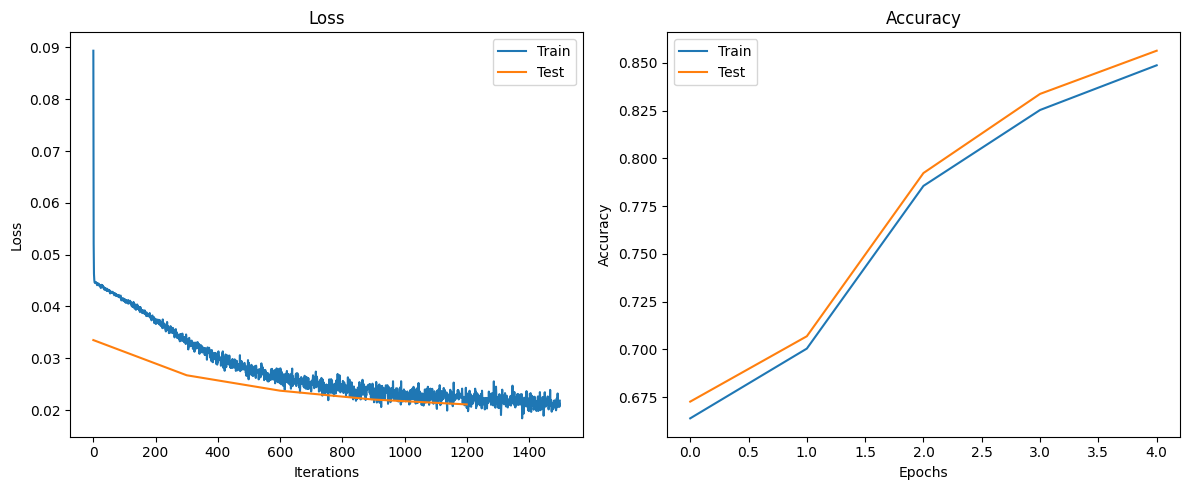

In [ ]:
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
learning_rate = 0.1
batch_size = 200
epochs = 5

# 데이터 저장을 위한 리스트
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(1, len(X_train) // batch_size)

# 학습 시작
for epoch in range(epochs):
    # 에폭별 손실값과 정확도 초기화
    epoch_train_loss = 0
    epoch_test_loss = 0
    epoch_train_acc = 0
    epoch_test_acc = 0
    
    # 미니배치 학습
    for i, (X_batch, y_batch) in enumerate(shuffle_batch(X_train, y_train_oh, batch_size)):
        # 기울기 계산
        grads = network.gradient(X_batch, y_batch)
        
        # 매개변수 갱신
        for key in network.params.keys():
            network.params[key] -= learning_rate * grads[key]
        
        # 손실값 계산 및 저장
        loss = network.loss(X_batch, y_batch)
        train_loss_list.append(loss)
        
        # 에폭별 손실값 누적
        epoch_train_loss += loss
        
        # 현재 진행상황 출력 (옵션)
        if i % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {i}/{iter_per_epoch}, Loss: {loss:.4f}")
    
    # 에폭별 평균 손실값 계산
    epoch_train_loss /= iter_per_epoch
    
    # 훈련 데이터 정확도 계산
    train_acc = network.accuracy(X_train, y_train_oh)
    train_acc_list.append(train_acc)
    
    # 테스트 데이터 손실값 계산
    test_loss = network.loss(X_test, y_test_oh)
    test_loss_list.append(test_loss)
    
    # 테스트 데이터 정확도 계산
    test_acc = network.accuracy(X_test, y_test_oh)
    test_acc_list.append(test_acc)
    
    # 에폭별 결과 출력
    print(f"Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# 최종 결과 출력
print("\n최종 결과")
print(f"Train Loss: {train_loss_list[-1]:.4f}, Train Acc: {train_acc_list[-1]:.4f}")
print(f"Test Loss: {test_loss_list[-1]:.4f}, Test Acc: {test_acc_list[-1]:.4f}")

# 손실값 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list)
plt.plot(np.arange(0, len(train_loss_list), len(train_loss_list)//len(test_loss_list)), test_loss_list)
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

In [24]:
my_data = np.array([[3,7,1,5], [2,4,5,6]])
print("My Data Shape:", my_data.shape)
print("My Data Max Index:", np.argmax(my_data))
print("My Data Max Index in Row:", np.argmax(my_data, axis=1))
print("My Data Max Index in Column:", np.argmax(my_data, axis=0))

My Data Shape: (2, 4)
My Data Max Index: 1
My Data Max Index in Row: [1 3]
My Data Max Index in Column: [0 0 1 1]


# 
#### 1-7번 문제 :
#### 위 결과를 보고 더 높은 Test data의 정확도를 달성하기 위한 방안을 제안하고 실행해보세요.

In [25]:
# 향상된 모델 파라미터
learning_rate = 0.01  # 학습률 감소
batch_size = 100      # 배치 크기 조정
epochs = 10           # 에폭 수 증가
weight_decay = 0.0001 # 가중치 감쇠 추가

# 신경망 구조 변경 - 더 넓은 은닉층
network_improved = MultiLayerNet(input_size=784, hidden_size_list=[200, 100], output_size=10,
                                activation='relu', weight_init_std='relu', weight_decay_lambda=weight_decay)

# 옵티마이저 사용 (SGD보다 개선된 Adam 사용)
optimizer = Adam(lr=learning_rate)

# 학습 과정 (이전과 유사하게 구현)
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(1, len(X_train) // batch_size)

for epoch in range(epochs):
    # 에폭별 손실값과 정확도 초기화
    epoch_train_loss = 0
    
    # 미니배치 학습
    for i, (X_batch, y_batch) in enumerate(shuffle_batch(X_train, y_train_oh, batch_size)):
        # 기울기 계산
        grads = network_improved.gradient(X_batch, y_batch)
        
        # 옵티마이저로 매개변수 갱신
        optimizer.update(network_improved.params, grads)
        
        # 손실값 계산 및 저장
        loss = network_improved.loss(X_batch, y_batch)
        train_loss_list.append(loss)
        
        # 에폭별 손실값 누적
        epoch_train_loss += loss
        
    # 에폭별 평균 손실값 계산
    epoch_train_loss /= iter_per_epoch
    
    # 훈련 데이터 정확도 계산
    train_acc = network_improved.accuracy(X_train, y_train_oh)
    train_acc_list.append(train_acc)
    
    # 테스트 데이터 손실값 계산
    test_loss = network_improved.loss(X_test, y_test_oh)
    test_loss_list.append(test_loss)
    
    # 테스트 데이터 정확도 계산
    test_acc = network_improved.accuracy(X_test, y_test_oh)
    test_acc_list.append(test_acc)
    
    # 에폭별 결과 출력
    print(f"Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# 최종 결과 출력
print("\n개선된 모델 최종 결과")
print(f"Train Loss: {train_loss_list[-1]:.4f}, Train Acc: {train_acc_list[-1]:.4f}")
print(f"Test Loss: {test_loss_list[-1]:.4f}, Test Acc: {test_acc_list[-1]:.4f}")

# 결과 시각화 (이전과 동일)

Epoch 1 - Train Loss: 0.0414, Train Acc: 0.9325, Test Loss: 0.0268, Test Acc: 0.9322
Epoch 2 - Train Loss: 0.0236, Train Acc: 0.9418, Test Loss: 0.0220, Test Acc: 0.9383
Epoch 3 - Train Loss: 0.0206, Train Acc: 0.9518, Test Loss: 0.0209, Test Acc: 0.9473
Epoch 4 - Train Loss: 0.0201, Train Acc: 0.9553, Test Loss: 0.0210, Test Acc: 0.9494
Epoch 5 - Train Loss: 0.0202, Train Acc: 0.9586, Test Loss: 0.0216, Test Acc: 0.9512
Epoch 6 - Train Loss: 0.0208, Train Acc: 0.9575, Test Loss: 0.0221, Test Acc: 0.9519
Epoch 7 - Train Loss: 0.0211, Train Acc: 0.9557, Test Loss: 0.0221, Test Acc: 0.9494
Epoch 8 - Train Loss: 0.0215, Train Acc: 0.9554, Test Loss: 0.0225, Test Acc: 0.9506
Epoch 9 - Train Loss: 0.0219, Train Acc: 0.9548, Test Loss: 0.0227, Test Acc: 0.9502
Epoch 10 - Train Loss: 0.0218, Train Acc: 0.9556, Test Loss: 0.0227, Test Acc: 0.9500

개선된 모델 최종 결과
Train Loss: 0.0208, Train Acc: 0.9556
Test Loss: 0.0227, Test Acc: 0.9500



최종 결과
Train Loss: 0.0208, Train Acc: 0.9556
Test Loss: 0.0227, Test Acc: 0.9500


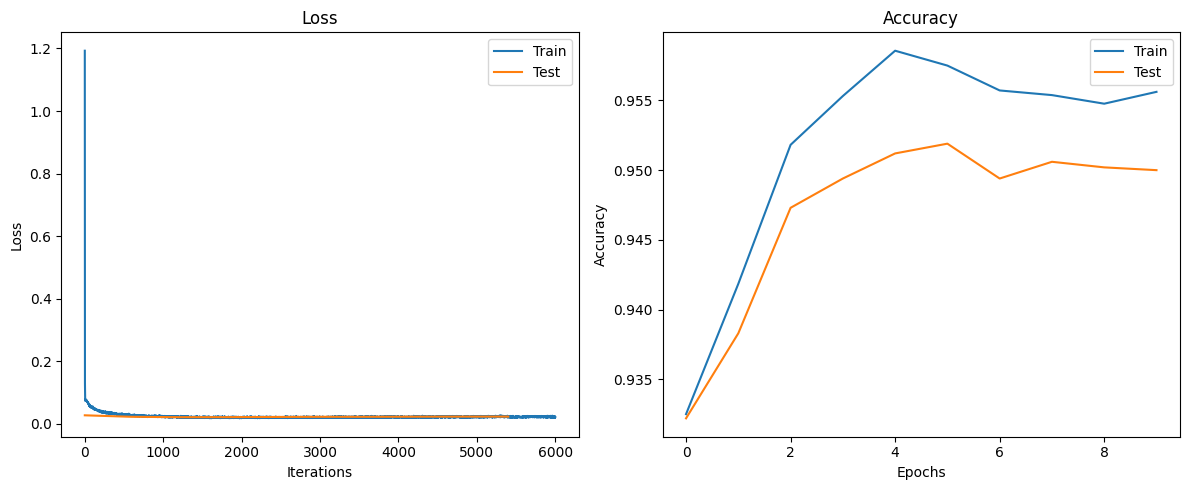

In [26]:
# 최종 결과 출력
print("\n최종 결과")
print(f"Train Loss: {train_loss_list[-1]:.4f}, Train Acc: {train_acc_list[-1]:.4f}")
print(f"Test Loss: {test_loss_list[-1]:.4f}, Test Acc: {test_acc_list[-1]:.4f}")

# 손실값 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list)
plt.plot(np.arange(0, len(train_loss_list), len(train_loss_list)//len(test_loss_list)), test_loss_list)
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# 코드 개선

1. **하이퍼파라미터 변경**:
   - 학습률(learning_rate): 0.1 → 0.01 (감소)
   - 배치 크기(batch_size): 200 → 100 (감소)
   - 에폭 수(epochs): 5 → 10 (증가)
   - 가중치 감쇠(weight_decay): 없음 → 0.0001 (추가)

2. **신경망 구조 변경**:
   - 은닉층 크기: [100, 50] → [200, 100] (더 넓은 구조)
   - 활성화 함수: sigmoid → relu (더 효과적인 함수)
   - 가중치 초기화 방법: 'sigmoid' → 'relu' (활성화 함수에 적합한 초기화)

3. **최적화 알고리즘 변경**:
   - 단순 경사하강법(SGD) → Adam 옵티마이저 (더 효율적인 최적화)
   - 매개변수 갱신 방식:
     ```python
     # 이전: 직접 갱신
     for key in network.params.keys():
         network.params[key] -= learning_rate * grads[key]
     
     # 변경: 옵티마이저 사용
     optimizer.update(network_improved.params, grads)
     ```

4. **신경망 객체**:
   - `network` → `network_improved` (개선된 모델 사용)

5. **출력 메시지**:
   - "최종 결과" → "개선된 모델 최종 결과" (결과 메시지 변경)
